### What it takes to be the best Tennis player in the world!

“Game, Set, Match!”

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. 

In this project, we will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data(https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals), we will determine what it takes to be one of the best tennis players in the world.

In [66]:
# let's import the required libraries first.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [67]:

# load and investigate the data here:

df = pd.read_csv(r"C:\Users\amanp\OneDrive\Desktop\tennis_stats.csv")
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are given. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

#### The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

#### Identifying Data

Player: name of the tennis player

Year: year data was recorded

#### Service Game Columns (Offensive)

Aces: number of serves by the player where the receiver does not touch the ball

DoubleFaults: number of times player missed both first and second serve attempts

FirstServe: % of first-serve attempts made

FirstServePointsWon: % of first-serve attempt points won by the player

SecondServePointsWon: % of second-serve attempt points won by the player

BreakPointsFaced: number of times where the receiver could have won service game of the player

BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance

ServiceGamesPlayed: total number of games where the player served

ServiceGamesWon: total number of games where the player served and won

TotalServicePointsWon: % of points in games where the player served that they won

#### Return Game Columns (Defensive)

FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win

SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win

BreakPointsOpportunities: number of times where the player could have won the service game of the opponent

BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance

ReturnGamesPlayed: total number of games where the player’s opponent served

ReturnGamesWon: total number of games where the player’s opponent served and the player won

ReturnPointsWon: total number of points where the player’s opponent served and the player won

TotalPointsWon: % of points won by the player

#### Outcomes

Wins: number of matches won in a year

Losses: number of matches lost in a year

Winnings: total winnings in USD($) in a year

Ranking: ranking at the end of year


### Let's perform exploratory analysis on the data by plotting different features against the different outcomes

In [68]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [69]:
offensive = ['Aces',
             'DoubleFaults',
             'FirstServe',
             'FirstServePointsWon',
             'SecondServePointsWon',
             'BreakPointsFaced',
             'BreakPointsSaved',
             'ServiceGamesPlayed',
             'ServiceGamesWon',
             'TotalServicePointsWon']
defensive = ['FirstServeReturnPointsWon',
             'SecondServeReturnPointsWon',
             'BreakPointsOpportunities',
             'BreakPointsConverted',
             'ReturnGamesPlayed',
             'ReturnGamesWon',
             'ReturnPointsWon',
             'TotalPointsWon']
features = offensive + defensive
outcomes = ['Wins',
            'Losses',
            'Winnings',
            'Ranking']




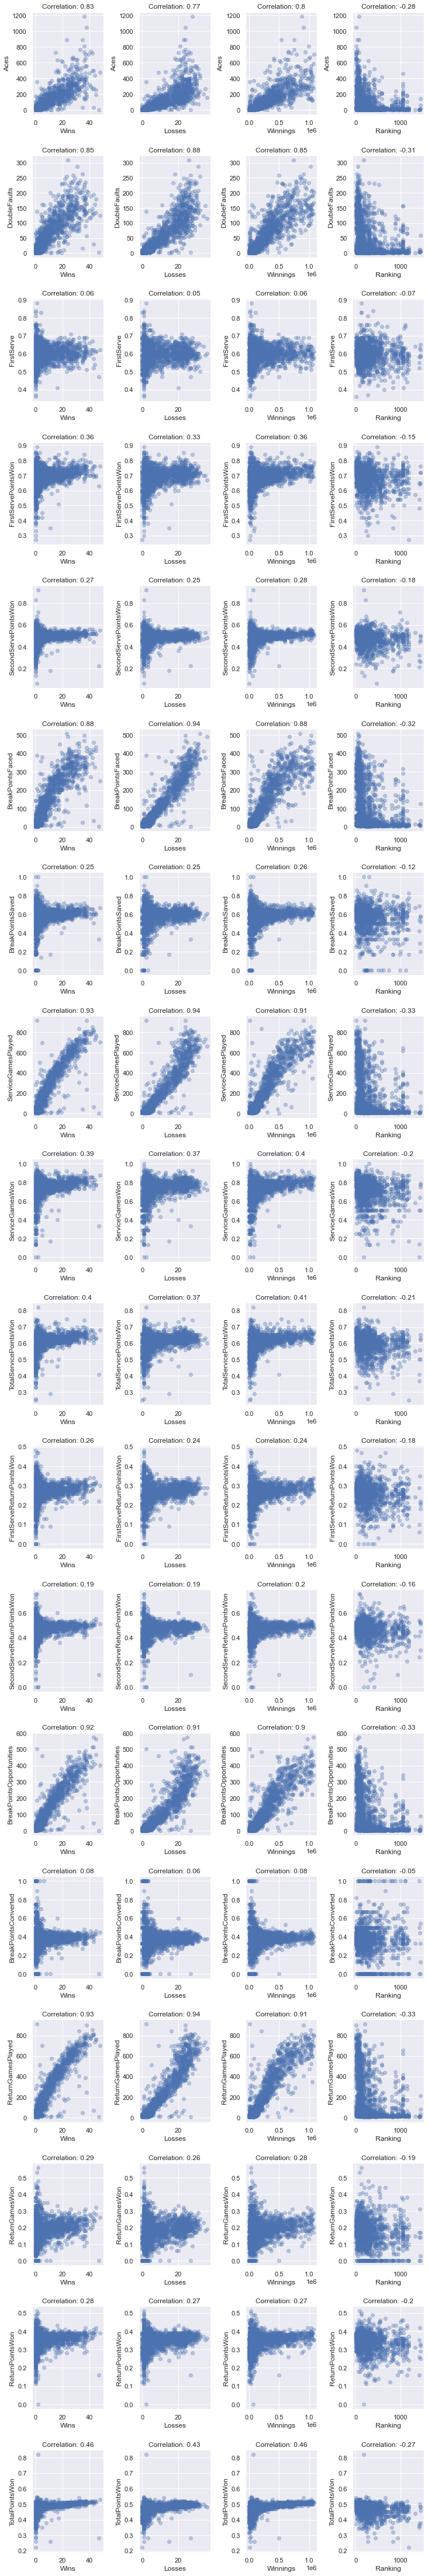

In [70]:
sns.set()

plt.figure(figsize=(12, 80))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for i in range(len(features)):
    for j in range(len(outcomes)):
        plt.subplot(len(features), len(outcomes), 1+i*len(outcomes)+j)
        plt.scatter(df[outcomes[j]], df[features[i]], alpha=0.33)
        plt.xlabel(outcomes[j])
        plt.ylabel(features[i])
        plt.title(f'Correlation: {round(df[features[i]].corr(df[outcomes[j]]), 2)}')
plt.show()

From the above plots we see that there is a strong relationship between BreakPointsFaced, BreakPointsOpportunities, ReturnGamesPlayed, SweviceGamesPlayed features and Winnings outcome.

## Single Feature Linear Regression Model

Let's use one feature from the dataset to build a single feature linear regression model on the data. Our model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, let's split our data into training and test datasets so that we can evaluate our model on the test set. 
Let's also plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

#### 1. For now let's use BreakPointsOpportunities feature and Winnings outcome to build the linear regression model.


In [6]:
X_1 = df[['BreakPointsOpportunities']]
y_1 = df[['Winnings']]

In [7]:
# Using scikit-learn’s train_test_split function to split our data into training and test sets.

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, train_size = 0.8)

In [21]:
# Creating a linear regression model and training it on the training data.

model = LinearRegression()
model.fit(X_1_train,y_1_train)

# To score the model on the test data, we will use our LinearRegression object’s .score() method.

print('Predicting Winnings with BreakPointsOpportunities Test Score: ' + str(model.score(X_1_test,y_1_test)))

# predicting the outcome based on our model.

prediction_1 = model.predict(X_1_test)

Predicting Winnings with BreakPointsOpportunities Test Score: 0.8274876481887316


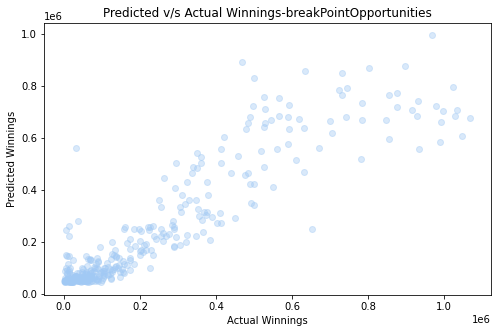

In [29]:
# plotting the predicted outcome against actual outcome.
plt.figure(figsize=(8,5))
plt.scatter(y_1_test,prediction_1, alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Predicted v/s Actual Winnings-breakPointOpportunities')
plt.show()


#### 2. Now let's use BreakPointsFaced feature and Winnings outcome to build the linear regression model.

In [55]:
X_2 = df[['BreakPointsFaced']]
y_2 = df[['Winnings']]

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, train_size = 0.8)

model = LinearRegression()
model.fit(X_2_train,y_2_train)

print('Predicting Winnings with BreakPointsFaced Test Score: ' + str(model.score(X_2_test,y_2_test)))

prediction_2 = model.predict(X_2_test)



Predicting Winnings with BreakPointsFaced Test Score: 0.7364140594103266


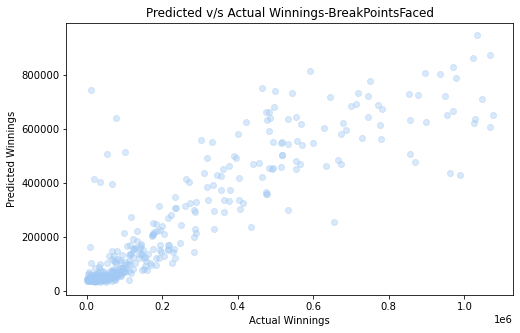

In [28]:

plt.figure(figsize=(8,5))
plt.scatter(y_2_test,prediction_2, alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Predicted v/s Actual Winnings-BreakPointsFaced')
plt.show()

#### 3. Now let's use ReturnGamesPlayed feature and Winnings outcome to build the linear regression model.

In [56]:
X_3 = df[['ReturnGamesPlayed']]
y_3 = df[['Winnings']]

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, train_size = 0.8)

model = LinearRegression()
model.fit(X_3_train,y_3_train)

print('Predicting Winnings with REturnGamesPlayed Test Score: ' + str(model.score(X_3_test,y_3_test)))

prediction_3 = model.predict(X_3_test)



Predicting Winnings with REturnGamesPlayed Test Score: 0.8682320908181036


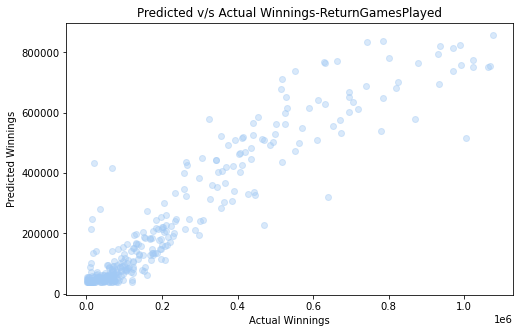

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(y_3_test,prediction_3, alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Predicted v/s Actual Winnings-ReturnGamesPlayed')
plt.show()

#### 4.  Now let's use ServiceGamesPlayed feature and Winnings outcome to build the linear regression model.

In [33]:
X_4 = df[['ServiceGamesPlayed']]
y_4 = df[['Winnings']]

X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, train_size = 0.8)

model = LinearRegression()
model.fit(X_4_train,y_4_train)

print('Predicting Winnings with ServiceGamesPlayed Test Score: ' + str(model.score(X_4_test,y_4_test)))

prediction_4 = model.predict(X_4_test)



Predicting Winnings with ServiceGamesPlayed Test Score: 0.8439963641312741


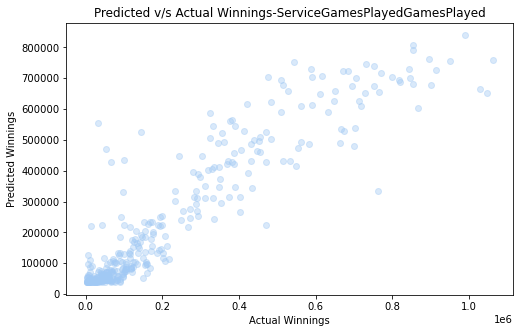

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(y_4_test,prediction_4, alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Predicted v/s Actual Winnings-ServiceGamesPlayedGamesPlayed')
plt.show()

#### From the abpve graphs and scores, we find that our best single feature linear regression model came from using 'BreakPOintOpportunities' as the feature to predict 'Winnings' with score of 0.8138276003146753

## Two features Linear Regression Models


Now let's create a few linear regression models that use two features to predict yearly earnings and see which set of two features results in the best model

#### 1. Let's create a linear regression model with 'BreakPointsOpportunities' and 'FirstServeReturnPointsWon' as our features to predict 'Winnings'

In [38]:
# We will follow the same stepsas in the case of single feature LR model, but now our features will be two instead os one.

X_5 = df[['BreakPointsOpportunities',
'FirstServeReturnPointsWon']]
y_5 = df[['Winnings']]


X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, train_size = 0.8)

model = LinearRegression()
model.fit(X_5_train,y_5_train)

print('Predicting Winnings with 2 Features, BreakPointsOpportunities and FirstServeReturnPointsWon Test Score: ' + str(model.score(X_5_test,y_5_test)))



Predicting Winnings with 2 Features, BreakPointsOpportunities and FirstServeReturnPointsWon Test Score: 0.7858693958138114


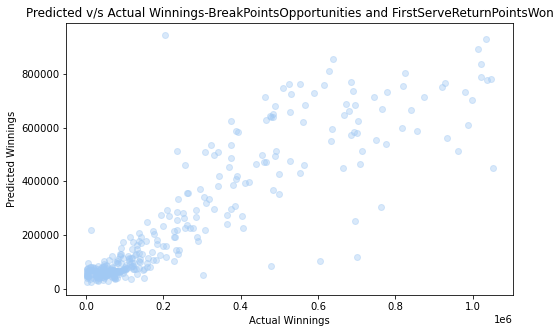

In [39]:
prediction_5 = model.predict(X_5_test)
plt.figure(figsize=(8,5))
plt.scatter(y_5_test,prediction_5, alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Predicted v/s Actual Winnings-BreakPointsOpportunities and FirstServeReturnPointsWon')
plt.show()

#### 2. Now  creating a linear regression model with 'BreakPointsOpportunities' and 'BreakPointsFaced' as our features to predict 'Winnings'

In [60]:
X_6 = df[['BreakPointsOpportunities',
'BreakPointsFaced']]
y_6 = df[['Winnings']]


X_6_train, X_6_test, y_6_train, y_6_test = train_test_split(X_6, y_6, train_size = 0.8)

model = LinearRegression()
model.fit(X_6_train,y_6_train)

print('Predicting Winnings with 2 Features, BreakPointsOpportunities and BreakPOintsFaced Test Score: ' + str(model.score(X_6_test,y_6_test)))



Predicting Winnings with 2 Features, BreakPointsOpportunities and BreakPOintsFaced Test Score: 0.840533057167165


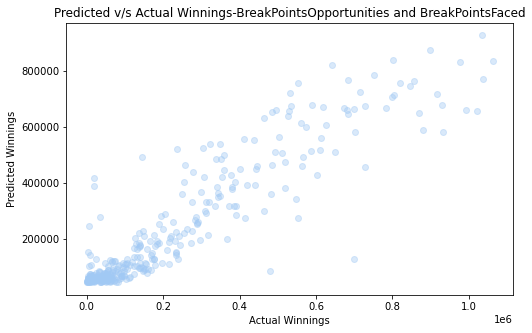

In [61]:
prediction_6 = model.predict(X_6_test)

plt.figure(figsize=(8,5))
plt.scatter(y_6_test,prediction_6, alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Predicted v/s Actual Winnings-BreakPointsOpportunities and BreakPointsFaced')
plt.show()

#### 3. Creating a linear regression model with 'BreakPointsOpportunities' and 'ReturnGamesPlayed'

In [62]:
X_7 = df[['BreakPointsOpportunities',
'ReturnGamesPlayed']]
y_7 = df[['Winnings']]


X_7_train, X_7_test, y_7_train, y_7_test = train_test_split(X_7, y_7, train_size = 0.8)

model = LinearRegression()
model.fit(X_7_train,y_7_train)

print('Predicting Winnings with 2 Features, BreakPointsOpportunities and ReturnGamesPlayed Test Score: ' + str(model.score(X_7_test,y_7_test)))



Predicting Winnings with 2 Features, BreakPointsOpportunities and ReturnGamesPlayed Test Score: 0.8563535209651233


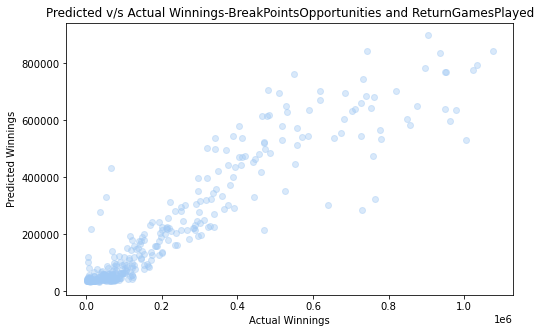

In [63]:
prediction_7 = model.predict(X_7_test)

plt.figure(figsize=(8,5))
plt.scatter(y_7_test,prediction_7, alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Predicted v/s Actual Winnings-BreakPointsOpportunities and ReturnGamesPlayed')
plt.show()

## Multiple features Linear Regression Models


Now lets' create a linear regression model that use multiple features to predict yearly earnings

In [49]:
X_8 = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
y_8 = df[['Winnings']]


X_8_train, X_8_test, y_8_train, y_8_test = train_test_split(X_8, y_8, train_size = 0.8)

model = LinearRegression()
model.fit(X_8_train,y_8_train)

print('Predicting Winnings with Multiple Features Test Score: ' +  str(model.score(X_8_test,y_8_test)))



Predicting Winnings with Multiple Features Test Score: 0.8164861425119437


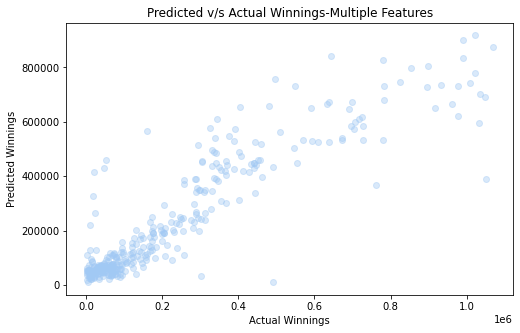

In [50]:
prediction_8 = model.predict(X_8_test)

plt.figure(figsize=(8,5))
plt.scatter(y_8_test,prediction_8, alpha=0.4)
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Predicted v/s Actual Winnings-Multiple Features')
plt.show()

### Conclusion:

1. Single Feature Regression Model scores:
- Winnings with BreakPointsOpportunities Test Score: 0.8274876481887316
- Winnings with BreakPointsFaced Test Score: 0.7364140594103266
- Winnings with REturnGamesPlayed Test Score: 0.8682320908181036
- Winnings with ServiceGamesPlayed Test Score: 0.8439963641312741

2. Two Features Linear Regression Model Scores:
- Winnings with BreakPointsOpportunities and FirstServeReturnPointsWon Test Score: 0.7858693958138114
- Winnings with BreakPointsOpportunities and BreakPOintsFaced Test Score: 0.840533057167165
- Winnings with BreakPointsOpportunities and ReturnGamesPlayed Test Score: 0.8563535209651233

3. Multiple Features linear Regression Model Scores:
- Winnings with Multiple Features Test Score: 0.8164861425119437

